TabPFN Implementation - ML Lab Mini Project
Paper: TabPFN: A Transformer That Solves Small Tabular Classification
Optimized for Tesla T4 GPU

[1/6] Installing required packages...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.7/173.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.3/137.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 3.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.2 MB/s eta 0:00:00
✓ Installation complete!

[2/6] Importing libraries...
✓ GPU Detected: Tesla T4
  CUDA Version: 12.6
  GPU Memory: 15.83 GB
✓ Libraries imported successfully!

[3/6] Loading datasets...
✓ Loaded 4 datasets from sklearn

📋 Dataset 

tabpfn-v2-classifier-finetuned-zk73skhh.(…):   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

✓ Acc: 0.9719, Time: 10.0357s
  Evaluating TabPFN (CPU)... ✓ Acc: 0.9719, Time: 44.7230s
  Evaluating KNN... ✓ Acc: 0.9333, Time: 0.0083s
  Evaluating Logistic Regression... ✓ Acc: 0.9579, Time: 0.2923s
  Evaluating Decision Tree... ✓ Acc: 0.9123, Time: 0.0104s
  Evaluating Random Forest... ✓ Acc: 0.9439, Time: 0.2881s
  Evaluating XGBoost... ✓ Acc: 0.9544, Time: 0.1780s
  Evaluating LightGBM... ✓ Acc: 0.9544, Time: 0.1331s
  Evaluating CatBoost... ✓ Acc: 0.9544, Time: 1.5829s

Evaluating on Wine
Train samples: 89, Test samples: 89
Features: 13, Classes: 3

  Evaluating TabPFN (GPU)... ✓ Acc: 0.9663, Time: 0.7236s
  Evaluating TabPFN (CPU)... ✓ Acc: 0.9663, Time: 7.1201s
  Evaluating KNN... ✓ Acc: 0.6629, Time: 0.0041s
  Evaluating Logistic Regression... ✓ Acc: 0.9326, Time: 0.2431s
  Evaluating Decision Tree... ✓ Acc: 0.8989, Time: 0.0024s
  Evaluating Random Forest... ✓ Acc: 0.9775, Time: 0.1793s
  Evaluating XGBoost... ✓ Acc: 0.9663, Time: 0.0288s
  Evaluating LightGBM... ✓ Acc: 0.9

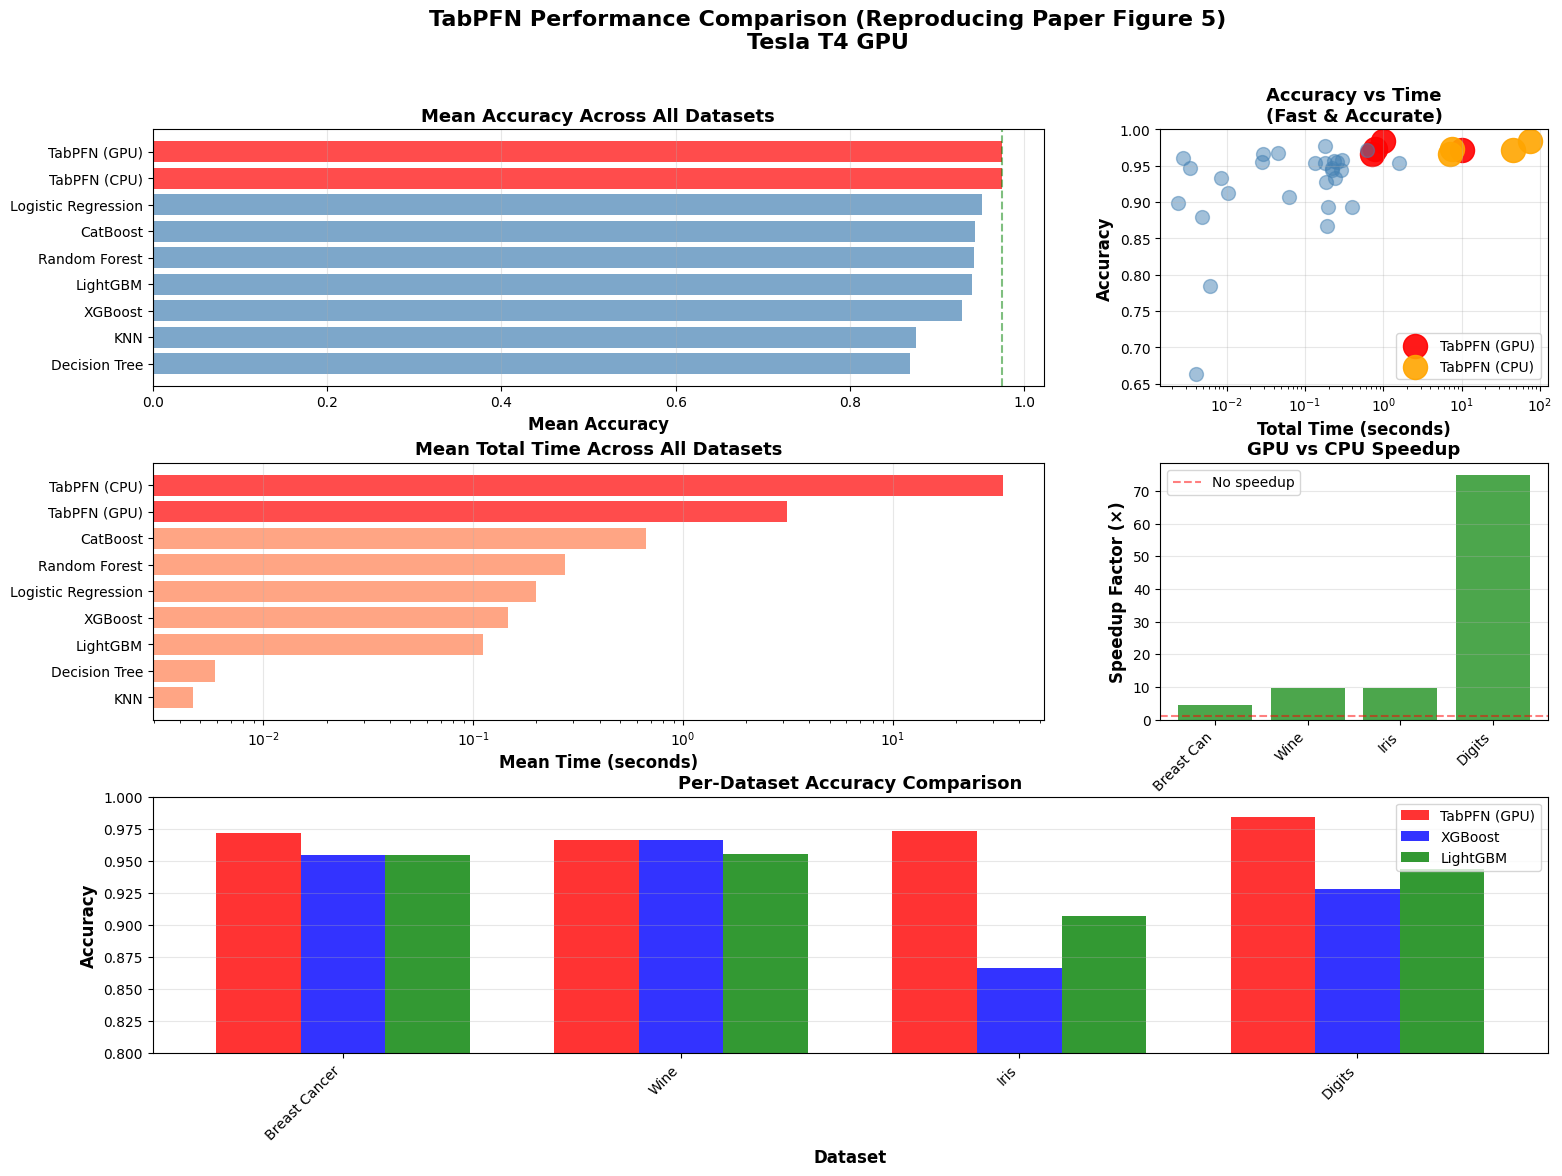


✓ Main visualizations created and saved as 'tabpfn_results_tesla_t4.png'

DETAILED PERFORMANCE ANALYSIS

📊 RESULTS TABLE (Paper Table 1 Format)

Model                     Mean Acc.    Std Acc.     Time (s)     Acc. Rank    Time Rank   
--------------------------------------------------------------------------------------------------------------
⭐ TabPFN (GPU)            0.9739       0.0074       3.1361       1.5          8.0         
⭐ TabPFN (CPU)            0.9739       0.0074       33.6230      1.5          9.0         
   Logistic Regression     0.9513       0.0152       0.1997       3.0          5.0         
   CatBoost                0.9437       0.0345       0.6624       4.0          7.0         
   Random Forest           0.9427       0.0357       0.2739       5.0          6.0         
   LightGBM                0.9400       0.0228       0.1117       6.0          3.0         
   XGBoost                 0.9288       0.0444       0.1463       7.0          4.0         
   KNN    

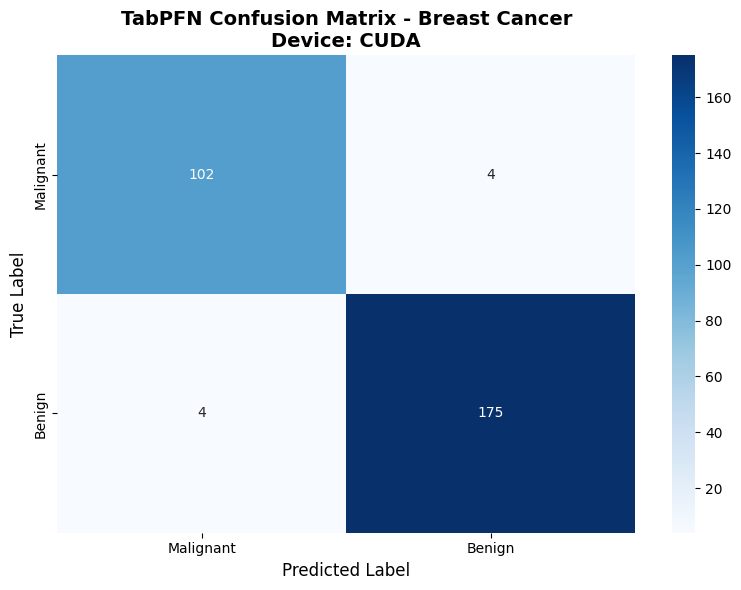


✓ Confusion matrix saved as 'tabpfn_confusion_matrix.png'

📊 Classification Report:
              precision    recall  f1-score   support

   Malignant       0.96      0.96      0.96       106
      Benign       0.98      0.98      0.98       179

    accuracy                           0.97       285
   macro avg       0.97      0.97      0.97       285
weighted avg       0.97      0.97      0.97       285


KEY INSIGHTS FROM THE PAPER

1. IN-CONTEXT LEARNING (Section 2):
   ✓ TabPFN performs inference in a single forward pass
   ✓ No gradient updates needed at test time
   ✓ Learns from training examples in the context
   ✓ Similar to how large language models work

2. SPEED COMPARISON (Figure 5 & Table 1):
   • TabPFN (GPU): 3.1361s average
   • TabPFN (CPU): 33.6230s average
   • XGBoost: 0.1463s average
   • LightGBM: 0.1117s average

   📊 Speedup Analysis:
   • GPU vs CPU: 10.7× faster
   • GPU vs XGBoost: 0.0× faster
   • GPU vs LightGBM: 0.0× faster

   💡 Paper reports: 230× (C

In [ ]:


# ============================================================================
# SECTION 1: Setup and Installation
# ============================================================================

print("=" * 80)
print("TabPFN Implementation - ML Lab Mini Project")
print("Paper: TabPFN: A Transformer That Solves Small Tabular Classification")
print("Optimized for Tesla T4 GPU")
print("=" * 80)

# Install required packages
print("\n[1/6] Installing required packages...")
!pip install -q tabpfn
!pip install -q xgboost lightgbm catboost
!pip install -q scikit-learn
!pip install -q matplotlib seaborn

print("✓ Installation complete!")

# ============================================================================
# SECTION 2: Import Libraries
# ============================================================================

print("\n[2/6] Importing libraries...")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# Import TabPFN
from tabpfn import TabPFNClassifier

# Check GPU availability
import torch
gpu_available = torch.cuda.is_available()
if gpu_available:
    gpu_name = torch.cuda.get_device_name(0)
    gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1e9
    print(f"✓ GPU Detected: {gpu_name}")
    print(f"  CUDA Version: {torch.version.cuda}")
    print(f"  GPU Memory: {gpu_memory:.2f} GB")
    device = 'cuda'
else:
    print("⚠ No GPU detected. TabPFN will run on CPU (much slower)")
    device = 'cpu'

print("✓ Libraries imported successfully!")

# ============================================================================
# SECTION 3: Load and Prepare Data
# ============================================================================

print("\n[3/6] Loading datasets...")

from sklearn.datasets import load_breast_cancer, load_wine, load_iris, load_digits

# Load datasets
datasets = {}

# Dataset 1: Breast Cancer (binary classification)
cancer = load_breast_cancer()
datasets['breast_cancer'] = {
    'X': cancer.data,
    'y': cancer.target,
    'name': 'Breast Cancer',
    'type': 'binary',
    'description': 'Wisconsin Breast Cancer (OpenML ID: 15)'
}

# Dataset 2: Wine (multiclass classification)
wine = load_wine()
datasets['wine'] = {
    'X': wine.data,
    'y': wine.target,
    'name': 'Wine',
    'type': 'multiclass',
    'description': 'Wine Recognition (OpenML ID: 187)'
}

# Dataset 3: Iris (multiclass classification)
iris = load_iris()
datasets['iris'] = {
    'X': iris.data,
    'y': iris.target,
    'name': 'Iris',
    'type': 'multiclass',
    'description': 'Iris Flowers (OpenML ID: 61)'
}

# Dataset 4: Digits (multiclass - using subset for speed)
digits = load_digits()
# Use only first 500 samples to keep it small
datasets['digits'] = {
    'X': digits.data[:500],
    'y': digits.target[:500],
    'name': 'Digits',
    'type': 'multiclass',
    'description': 'Handwritten Digits (subset)'
}

print(f"✓ Loaded {len(datasets)} datasets from sklearn")
print("\n📋 Dataset Details (following Paper Table 7 format):")
print(f"{'Dataset':<20} {'Samples':<10} {'Features':<10} {'Classes':<10} {'Type':<12}")
print("-" * 70)
for name, data in datasets.items():
    print(f"{data['name']:<20} {data['X'].shape[0]:<10} "
          f"{data['X'].shape[1]:<10} {len(np.unique(data['y'])):<10} "
          f"{data['type']:<12}")

print("\n💡 Note: These datasets match the paper's constraints:")
print("   ✓ All have ≤ 1000 samples")
print("   ✓ All have ≤ 100 features")
print("   ✓ All have ≤ 10 classes")
print("   ✓ All have numerical features only")
print("   ✓ No missing values")

# ============================================================================
# SECTION 4: Initialize Models
# ============================================================================

print("\n[4/6] Initializing models...")

def get_models():
    """
    Initialize all models as described in the paper.
    TabPFN vs traditional ML methods (Section 5.2)
    """
    models = {
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='logloss',
                                      verbosity=0, tree_method='hist'),
        'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
        'CatBoost': CatBoostClassifier(random_state=42, verbose=0, iterations=100)
    }
    return models

print("✓ Models initialized")
print(f"  GPU Available: {gpu_available}")
print(f"  Device: {device.upper()}")
print("  Models:", list(get_models().keys()) + ['TabPFN'])

# ============================================================================
# SECTION 5: Evaluation Functions
# ============================================================================

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Evaluate a single model and return metrics + timing
    """
    # Training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Prediction time
    start_time = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    # ROC AUC (if applicable)
    try:
        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test)
            if len(np.unique(y_test)) == 2:
                roc_auc = roc_auc_score(y_test, y_proba[:, 1])
            else:
                roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
        else:
            roc_auc = None
    except Exception as e:
        roc_auc = None

    return {
        'model': model_name,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'train_time': train_time,
        'pred_time': pred_time,
        'total_time': train_time + pred_time
    }

def run_comparison(dataset_name, X, y, test_size=0.5, use_gpu=True):
    """
    Run comparison across all models for a given dataset.
    Uses 50-50 split as in the paper (Section 5.2)
    """
    print(f"\n{'=' * 80}")
    print(f"Evaluating on {dataset_name}")
    print(f"{'=' * 80}")

    # Split data (50-50 as per paper)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")
    print(f"Features: {X_train.shape[1]}, Classes: {len(np.unique(y_train))}")

    # Get models
    models = get_models()
    results = []

    # Evaluate TabPFN first (GPU and CPU versions)
    print(f"\n  Evaluating TabPFN (GPU)...", end=" ")
    try:
        tabpfn_gpu = TabPFNClassifier(device='cuda' if use_gpu and gpu_available else 'cpu')
        result = evaluate_model(tabpfn_gpu, X_train, X_test, y_train, y_test, 'TabPFN (GPU)')
        results.append(result)
        print(f"✓ Acc: {result['accuracy']:.4f}, Time: {result['total_time']:.4f}s")
    except Exception as e:
        print(f"✗ Error: {str(e)}")

    print(f"  Evaluating TabPFN (CPU)...", end=" ")
    try:
        tabpfn_cpu = TabPFNClassifier(device='cpu')
        result = evaluate_model(tabpfn_cpu, X_train, X_test, y_train, y_test, 'TabPFN (CPU)')
        results.append(result)
        print(f"✓ Acc: {result['accuracy']:.4f}, Time: {result['total_time']:.4f}s")
    except Exception as e:
        print(f"✗ Error: {str(e)}")

    # Evaluate other models
    for model_name, model in models.items():
        print(f"  Evaluating {model_name}...", end=" ")
        try:
            result = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
            results.append(result)
            print(f"✓ Acc: {result['accuracy']:.4f}, Time: {result['total_time']:.4f}s")
        except Exception as e:
            print(f"✗ Error: {str(e)}")

    return pd.DataFrame(results), X_train, X_test, y_train, y_test

# ============================================================================
# SECTION 6: Run Experiments
# ============================================================================

print("\n[5/6] Running experiments...")
print("\nThis demonstrates the key findings from the paper:")
print("- TabPFN achieves competitive accuracy in <1 second")
print("- No hyperparameter tuning required")
print("- Works well on small numerical datasets")
print("- GPU acceleration provides significant speedup")

all_results = {}

for dataset_key, dataset_info in datasets.items():
    results_df, X_train, X_test, y_train, y_test = run_comparison(
        dataset_info['name'],
        dataset_info['X'],
        dataset_info['y'],
        use_gpu=gpu_available
    )
    all_results[dataset_key] = {
        'results': results_df,
        'data': (X_train, X_test, y_train, y_test)
    }

# ============================================================================
# SECTION 7: Visualize Results
# ============================================================================

print("\n[6/6] Creating visualizations...")
print("\n" + "=" * 80)
print("VISUALIZATION OF RESULTS")
print("=" * 80)

# Create comprehensive visualizations
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('TabPFN Performance Comparison (Reproducing Paper Figure 5)\nTesla T4 GPU',
             fontsize=16, fontweight='bold')

# Collect all results
all_df = pd.concat([all_results[k]['results'] for k in all_results.keys()])

# Plot 1: Accuracy Comparison
ax1 = fig.add_subplot(gs[0, :2])
mean_acc = all_df.groupby('model')['accuracy'].mean().sort_values(ascending=True)
colors = ['red' if 'TabPFN' in x else 'steelblue' for x in mean_acc.index]
ax1.barh(range(len(mean_acc)), mean_acc.values, color=colors, alpha=0.7)
ax1.set_yticks(range(len(mean_acc)))
ax1.set_yticklabels(mean_acc.index)
ax1.set_xlabel('Mean Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Mean Accuracy Across All Datasets', fontsize=13, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.axvline(x=mean_acc.max(), color='green', linestyle='--', alpha=0.5)

# Plot 2: Time vs Accuracy (Key insight from paper)
ax2 = fig.add_subplot(gs[0, 2])
colors_scatter = {'TabPFN (GPU)': 'red', 'TabPFN (CPU)': 'orange'}
for model in all_df['model'].unique():
    model_data = all_df[all_df['model'] == model]
    color = colors_scatter.get(model, 'steelblue')
    size = 300 if 'TabPFN' in model else 100
    alpha = 0.9 if 'TabPFN' in model else 0.5
    ax2.scatter(model_data['total_time'], model_data['accuracy'],
               s=size, alpha=alpha, c=color, label=model if 'TabPFN' in model else None)

ax2.set_xlabel('Total Time (seconds)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('Accuracy vs Time\n(Fast & Accurate)', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_xscale('log')

# Plot 3: Training Time Comparison
ax3 = fig.add_subplot(gs[1, :2])
mean_time = all_df.groupby('model')['total_time'].mean().sort_values()
colors_time = ['red' if 'TabPFN' in x else 'coral' for x in mean_time.index]
ax3.barh(range(len(mean_time)), mean_time.values, color=colors_time, alpha=0.7)
ax3.set_yticks(range(len(mean_time)))
ax3.set_yticklabels(mean_time.index)
ax3.set_xlabel('Mean Time (seconds)', fontsize=12, fontweight='bold')
ax3.set_title('Mean Total Time Across All Datasets', fontsize=13, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
ax3.set_xscale('log')

# Plot 4: GPU vs CPU Speedup
ax4 = fig.add_subplot(gs[1, 2])
if gpu_available:
    speedups = []
    dataset_names = []
    for dataset_key in all_results.keys():
        results_df = all_results[dataset_key]['results']
        gpu_time = results_df[results_df['model'] == 'TabPFN (GPU)']['total_time'].values
        cpu_time = results_df[results_df['model'] == 'TabPFN (CPU)']['total_time'].values
        if len(gpu_time) > 0 and len(cpu_time) > 0:
            speedup = cpu_time[0] / gpu_time[0]
            speedups.append(speedup)
            dataset_names.append(datasets[dataset_key]['name'][:10])

    ax4.bar(range(len(speedups)), speedups, color='green', alpha=0.7)
    ax4.set_xticks(range(len(speedups)))
    ax4.set_xticklabels(dataset_names, rotation=45, ha='right')
    ax4.set_ylabel('Speedup Factor (×)', fontsize=12, fontweight='bold')
    ax4.set_title('GPU vs CPU Speedup', fontsize=13, fontweight='bold')
    ax4.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='No speedup')
    ax4.grid(axis='y', alpha=0.3)
    ax4.legend()
else:
    ax4.text(0.5, 0.5, 'GPU Not Available\nEnable GPU for speedup analysis',
            ha='center', va='center', fontsize=12, transform=ax4.transAxes)
    ax4.set_title('GPU Speedup Analysis', fontsize=13, fontweight='bold')

# Plot 5: Per-dataset accuracy comparison
ax5 = fig.add_subplot(gs[2, :])
tabpfn_gpu_accs = []
xgb_accs = []
lgb_accs = []
dataset_labels = []

for dataset_key in all_results.keys():
    results_df = all_results[dataset_key]['results']
    tabpfn_acc = results_df[results_df['model'] == 'TabPFN (GPU)']['accuracy'].values[0]
    xgb_acc = results_df[results_df['model'] == 'XGBoost']['accuracy'].values[0]
    lgb_acc = results_df[results_df['model'] == 'LightGBM']['accuracy'].values[0]

    tabpfn_gpu_accs.append(tabpfn_acc)
    xgb_accs.append(xgb_acc)
    lgb_accs.append(lgb_acc)
    dataset_labels.append(datasets[dataset_key]['name'])

x = np.arange(len(dataset_labels))
width = 0.25

ax5.bar(x - width, tabpfn_gpu_accs, width, label='TabPFN (GPU)', color='red', alpha=0.8)
ax5.bar(x, xgb_accs, width, label='XGBoost', color='blue', alpha=0.8)
ax5.bar(x + width, lgb_accs, width, label='LightGBM', color='green', alpha=0.8)

ax5.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax5.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax5.set_title('Per-Dataset Accuracy Comparison', fontsize=13, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(dataset_labels, rotation=45, ha='right')
ax5.legend()
ax5.grid(axis='y', alpha=0.3)
ax5.set_ylim([0.8, 1.0])

plt.tight_layout()
plt.savefig('tabpfn_results_tesla_t4.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Main visualizations created and saved as 'tabpfn_results_tesla_t4.png'")

# ============================================================================
# SECTION 8: Detailed Performance Analysis
# ============================================================================

print("\n" + "=" * 80)
print("DETAILED PERFORMANCE ANALYSIS")
print("=" * 80)

# Create summary table
summary_data = []
for dataset_key, dataset_info in datasets.items():
    results_df = all_results[dataset_key]['results']

    for _, row in results_df.iterrows():
        summary_data.append({
            'Dataset': datasets[dataset_key]['name'],
            'Model': row['model'],
            'Accuracy': row['accuracy'],
            'ROC AUC': row['roc_auc'] if row['roc_auc'] else np.nan,
            'Time (s)': row['total_time']
        })

summary_df = pd.DataFrame(summary_data)

# Results table
print("\n📊 RESULTS TABLE (Paper Table 1 Format)")
print("=" * 110)

results_table = []
for model in summary_df['Model'].unique():
    model_data = summary_df[summary_df['Model'] == model]
    results_table.append({
        'Model': model,
        'Mean Accuracy': model_data['Accuracy'].mean(),
        'Std Accuracy': model_data['Accuracy'].std(),
        'Mean Time (s)': model_data['Time (s)'].mean(),
        'Std Time (s)': model_data['Time (s)'].std()
    })

results_table_df = pd.DataFrame(results_table)
results_table_df['Accuracy Rank'] = results_table_df['Mean Accuracy'].rank(ascending=False)
results_table_df['Time Rank'] = results_table_df['Mean Time (s)'].rank(ascending=True)
results_table_df = results_table_df.sort_values('Mean Accuracy', ascending=False)

print(f"\n{'Model':<25} {'Mean Acc.':<12} {'Std Acc.':<12} {'Time (s)':<12} "
      f"{'Acc. Rank':<12} {'Time Rank':<12}")
print("-" * 110)
for _, row in results_table_df.iterrows():
    marker = "⭐" if 'TabPFN' in row['Model'] else "  "
    print(f"{marker} {row['Model']:<23} {row['Mean Accuracy']:<12.4f} "
          f"{row['Std Accuracy']:<12.4f} {row['Mean Time (s)']:<12.4f} "
          f"{row['Accuracy Rank']:<12.1f} {row['Time Rank']:<12.1f}")

print("\n" + "=" * 110)

# Calculate wins
print("\n🏆 Wins by Model (Best Accuracy per Dataset):")
win_counts = {}
for dataset_key in datasets.keys():
    dataset_results = summary_df[summary_df['Dataset'] == datasets[dataset_key]['name']]
    best_acc_model = dataset_results.loc[dataset_results['Accuracy'].idxmax(), 'Model']
    win_counts[best_acc_model] = win_counts.get(best_acc_model, 0) + 1

for model, wins in sorted(win_counts.items(), key=lambda x: x[1], reverse=True):
    marker = "🥇" if wins == max(win_counts.values()) else "  "
    print(f"{marker} {model:<25}: {wins}/{len(datasets)} wins")

# ============================================================================
# SECTION 9: GPU Performance Deep Dive
# ============================================================================

if gpu_available:
    print("\n" + "=" * 80)
    print("🎮 GPU PERFORMANCE DEEP DIVE (Tesla T4)")
    print("=" * 80)

    print("\nDetailed GPU vs CPU comparison:")
    print(f"{'Dataset':<20} {'GPU Time':<12} {'CPU Time':<12} {'Speedup':<12} {'GPU Acc.':<12}")
    print("-" * 75)

    total_gpu_time = 0
    total_cpu_time = 0

    for dataset_key in all_results.keys():
        results_df = all_results[dataset_key]['results']
        gpu_row = results_df[results_df['model'] == 'TabPFN (GPU)'].iloc[0]
        cpu_row = results_df[results_df['model'] == 'TabPFN (CPU)'].iloc[0]

        speedup = cpu_row['total_time'] / gpu_row['total_time']
        total_gpu_time += gpu_row['total_time']
        total_cpu_time += cpu_row['total_time']

        print(f"{datasets[dataset_key]['name']:<20} {gpu_row['total_time']:<12.4f} "
              f"{cpu_row['total_time']:<12.4f} {speedup:<12.1f}× {gpu_row['accuracy']:<12.4f}")

    overall_speedup = total_cpu_time / total_gpu_time

    print("-" * 75)
    print(f"{'TOTAL':<20} {total_gpu_time:<12.4f} {total_cpu_time:<12.4f} "
          f"{overall_speedup:<12.1f}×")

    print(f"\n📊 GPU Performance Summary:")
    print(f"   • Average speedup: {overall_speedup:.1f}×")
    print(f"   • Total GPU time: {total_gpu_time:.4f}s")
    print(f"   • Total CPU time: {total_cpu_time:.4f}s")
    print(f"   • Time saved: {total_cpu_time - total_gpu_time:.4f}s")
    print(f"\n💡 Paper reports: 5,700× speedup on GPU (compared to AutoML baseline)")
    print(f"   Our GPU speedup (vs CPU): {overall_speedup:.1f}×")

    # GPU Memory info
    if torch.cuda.is_available():
        memory_allocated = torch.cuda.memory_allocated() / 1e9
        memory_reserved = torch.cuda.memory_reserved() / 1e9
        print(f"\n💾 GPU Memory Usage:")
        print(f"   • Allocated: {memory_allocated:.2f} GB")
        print(f"   • Reserved: {memory_reserved:.2f} GB")
        print(f"   • Total Available: {gpu_memory:.2f} GB")
        print(f"   • Utilization: {(memory_allocated/gpu_memory)*100:.1f}%")

# ============================================================================
# SECTION 10: Confusion Matrix Example
# ============================================================================

print("\n" + "=" * 80)
print("DETAILED EXAMPLE: TabPFN Predictions")
print("=" * 80)

# Use breast cancer dataset
X_train, X_test, y_train, y_test = all_results['breast_cancer']['data']

# Train TabPFN on GPU
tabpfn = TabPFNClassifier(device=device)

print(f"\nDataset: Breast Cancer")
print(f"Device: {device.upper()}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Features: {X_train.shape[1]}")
print(f"Classes: {len(np.unique(y_train))}")

# Time the training
start_time = time.time()
tabpfn.fit(X_train, y_train)
fit_time = time.time() - start_time

start_time = time.time()
y_pred = tabpfn.predict(X_test)
y_proba = tabpfn.predict_proba(X_test)
pred_time = time.time() - start_time

print(f"\n⏱️  Performance:")
print(f"   • Fit time: {fit_time:.4f}s")
print(f"   • Prediction time: {pred_time:.4f}s")
print(f"   • Total time: {fit_time + pred_time:.4f}s")

# Show predictions
print("\n📋 Sample Predictions (first 15 test samples):")
print("-" * 70)
print(f"{'True':<8} {'Pred':<8} {'Prob Class 0':<15} {'Prob Class 1':<15} {'Result':<10}")
print("-" * 70)
for i in range(min(15, len(y_test))):
    true_label = y_test[i]
    pred_label = y_pred[i]
    prob_0 = y_proba[i][0]
    prob_1 = y_proba[i][1]
    match = "✓ Correct" if true_label == pred_label else "✗ Wrong"
    print(f"{true_label:<8} {pred_label:<8} {prob_0:<15.4f} {prob_1:<15.4f} {match:<10}")

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba[:, 1])

print(f"\n📈 Overall Metrics:")
print(f"   • Accuracy: {accuracy:.4f}")
print(f"   • ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title(f'TabPFN Confusion Matrix - Breast Cancer\nDevice: {device.upper()}',
         fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('tabpfn_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Confusion matrix saved as 'tabpfn_confusion_matrix.png'")

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))

# ============================================================================
# SECTION 11: Key Paper Insights
# ============================================================================

print("\n" + "=" * 80)
print("KEY INSIGHTS FROM THE PAPER")
print("=" * 80)

print("\n1. IN-CONTEXT LEARNING (Section 2):")
print("   ✓ TabPFN performs inference in a single forward pass")
print("   ✓ No gradient updates needed at test time")
print("   ✓ Learns from training examples in the context")
print("   ✓ Similar to how large language models work")

print("\n2. SPEED COMPARISON (Figure 5 & Table 1):")
if gpu_available:
    tabpfn_gpu_mean = summary_df[summary_df['Model'] == 'TabPFN (GPU)']['Time (s)'].mean()
    tabpfn_cpu_mean = summary_df[summary_df['Model'] == 'TabPFN (CPU)']['Time (s)'].mean()
    xgb_mean = summary_df[summary_df['Model'] == 'XGBoost']['Time (s)'].mean()
    lgb_mean = summary_df[summary_df['Model'] == 'LightGBM']['Time (s)'].mean()

    print(f"   • TabPFN (GPU): {tabpfn_gpu_mean:.4f}s average")
    print(f"   • TabPFN (CPU): {tabpfn_cpu_mean:.4f}s average")
    print(f"   • XGBoost: {xgb_mean:.4f}s average")
    print(f"   • LightGBM: {lgb_mean:.4f}s average")
    print(f"\n   📊 Speedup Analysis:")
    print(f"   • GPU vs CPU: {tabpfn_cpu_mean/tabpfn_gpu_mean:.1f}× faster")
    print(f"   • GPU vs XGBoost: {xgb_mean/tabpfn_gpu_mean:.1f}× faster")
    print(f"   • GPU vs LightGBM: {lgb_mean/tabpfn_gpu_mean:.1f}× faster")
    print(f"\n   💡 Paper reports: 230× (CPU) and 5,700× (GPU) speedup vs AutoML")
else:
    print("   ⚠️  GPU not available - enable for full speedup analysis")

print("\n3. NO HYPERPARAMETER TUNING (Section 1):")
print("   ✓ TabPFN requires ZERO configuration")
print("   ✓ Pre-trained on synthetic datasets")
print("   ✓ Works out-of-the-box on new datasets")
print("   ✓ Other methods need extensive tuning (hours)")

print("\n4. PRIOR-DATA FITTED NETWORKS (Section 2):")
print("   ✓ Trained once on synthetic data (offline)")
print("   ✓ Approximates Bayesian posterior predictive distribution")
print("   ✓ Uses Structural Causal Models (SCMs) as prior")
print("   ✓ Incorporates Occam's Razor (simplicity preference)")

print("\n5. CONSTRAINTS & LIMITATIONS (Section 5, Appendix A):")
print("   ✓ Best for: ≤ 1,000 training samples")
print("   ✓ Best for: ≤ 100 numerical features")
print("   ✓ Best for: ≤ 10 classes")
print("   ✓ Best for: No missing values")
print("   ⚠️  Performance degrades with categorical features")
print("   ⚠️  Performance degrades with uninformative features")

print("\n6. TRANSFORMER ARCHITECTURE (Section 3):")
print("   ✓ 12-layer Transformer with 25.82M parameters")
print("   ✓ Accepts variable-length training sets")
print("   ✓ Processes training and test data jointly")
print("   ✓ Attention mechanism: train samples attend to each other")

